# Neural Network Sample

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Building a neural network

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple

np.random.seed(7191)

class Neural:

    def __init__(self, layers: List[int], epochs: int,
                 learning_rate: float = 0.001, batch_size: int=32,
                 validation_split: float = 0.2, verbose: int=1):
        self._layer_structure: List[int] = layers
        self._batch_size: int = batch_size
        self._epochs: int = epochs
        self._learning_rate: float = learning_rate
        self._validation_split: float = validation_split
        self._verbose: int = verbose
        self._losses: Dict[str, float] = {"train": [], "validation": []}
        self._is_fit: bool = False
        self.__layers = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # validation split
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        # initialization of layers
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                # forward pass
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                # calculate loss
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                #backward
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds,y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            if self._verbose:
                print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
        return

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._is_fit == False:
            raise Exception("Model has not been trained yet.")
        pred, hidden = self.__forward(X)
        return pred

    def plot_learning(self) -> None:
        plt.plot(self._losses["train"],label="loss")
        plt.plot(self._losses["validation"],label="validation")
        plt.legend()

    def __init_layers(self) -> List[np.ndarray]:
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1,self._layer_structure[i]))
            ])
        return layers

    def __forward(self, batch: np.ndarray) -> Tuple[np.ndarray, List[np.ndarray]]:
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            # Store the forward pass hidden values for use in backprop
            hidden.append(batch.copy())
        return batch, hidden

    def __calculate_loss(self,actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        "mse"
        return predicted - actual


    def __calculate_mse(self, actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        return (actual - predicted) ** 2

    def __backward(self, hidden: List[np.ndarray], grad: np.ndarray) -> None:
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)

            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate

            grad = grad @ self.__layers[i][0].T
        return
#Let’s generate some dummy data to test the Neural.

def generate_data():
    # Define correlation values
    corr_a = 0.8
    corr_b = 0.4
    corr_c = -0.2

    # Generate independent features
    a = np.random.normal(0, 1, size=100000)
    b = np.random.normal(0, 1, size=100000)
    c = np.random.normal(0, 1, size=100000)
    d = np.random.randint(0, 4, size=100000)
    e = np.random.binomial(1, 0.5, size=100000)

    # Generate target feature based on independent features
    target = 50 + corr_a*a + corr_b*b + corr_c*c + d*10 + 20*e + np.random.normal(0, 10, size=100000)

    # Create DataFrame with all features
    df = pd.DataFrame({'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'target': target})
    return df

## Fitting the model on randomly generated data

Epoch: 0 Train MSE: 5924.858403604577 Valid MSE: 5676.13214068216
Epoch: 1 Train MSE: 5752.809297429296 Valid MSE: 5466.174297190558
Epoch: 2 Train MSE: 5518.380875129211 Valid MSE: 5146.159040174341
Epoch: 3 Train MSE: 5155.119501631794 Valid MSE: 4642.750289036354
Epoch: 4 Train MSE: 4588.047849271646 Valid MSE: 3890.8583091543665
Epoch: 5 Train MSE: 3760.683660893951 Valid MSE: 2893.0895378761807
Epoch: 6 Train MSE: 2704.7305632519065 Valid MSE: 1801.4937223355037
Epoch: 7 Train MSE: 1614.6365701485618 Valid MSE: 901.741805758617
Epoch: 8 Train MSE: 785.0054174030163 Valid MSE: 389.84809112897307
Epoch: 9 Train MSE: 355.2830586580084 Valid MSE: 192.34208391731678
Epoch: 10 Train MSE: 202.57150320906555 Valid MSE: 133.30622206223362
Epoch: 11 Train MSE: 157.62760322927411 Valid MSE: 116.33188376029054
Epoch: 12 Train MSE: 142.44695648286364 Valid MSE: 111.4368697824453
Epoch: 13 Train MSE: 135.57053907720666 Valid MSE: 110.60777592909503
Epoch: 14 Train MSE: 131.81401083031832 Valid 

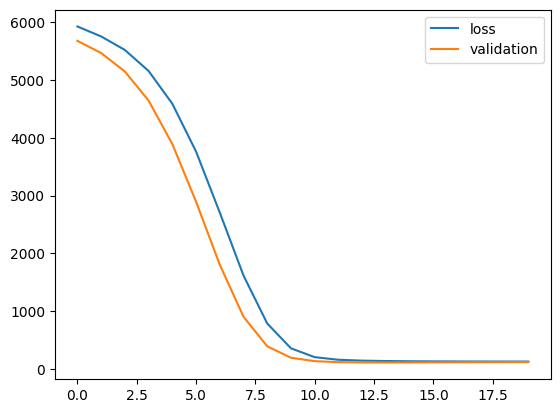

In [3]:
df = generate_data()

# Separate the features and target
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

layer_structure = [X_train.shape[1],10,10,1]
nn = Neural(layer_structure, 20, 1e-5, 64, 0.2, 1)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

### randomly generated data from above

In [4]:
df

,a,b,c,d,e,target
0,-0.336975,1.539382,0.085393,0,0,56.527071
1,0.140006,-0.042273,1.171705,0,1,78.159933
2,-1.035290,1.999564,0.995256,1,0,39.447661
3,-1.523176,-1.089355,1.575096,3,1,108.087030
4,1.190319,0.127029,-0.408177,1,1,68.289088
...,...,...,...,...,...,...
99995,0.594251,-2.039198,-0.767510,1,1,96.780264
99996,-1.563777,-0.350222,1.171843,0,1,56.308916
99997,0.772433,1.445736,-0.183360,0,0,50.282463
99998,-0.113206,-0.230634,-0.483486,3,1,106.890243


## Importing user/manual dataset and preprocessing according to the model

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Assume 'df' is your DataFrame with categorical variables
# Let's say 'categorical_columns' is a list of columns containing categorical data

label_encoder = LabelEncoder()


# Load your dataset
df = pd.read_csv('/content/data.csv')


### Pre-processed data, ready to pass for model fitting.

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

df = df.drop('id',axis=1)
df =  df.drop('Unnamed: 32',axis=1)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Fitting the model on the imported pre-processed dataset

### Feature extraction using correlation analysis against target variable

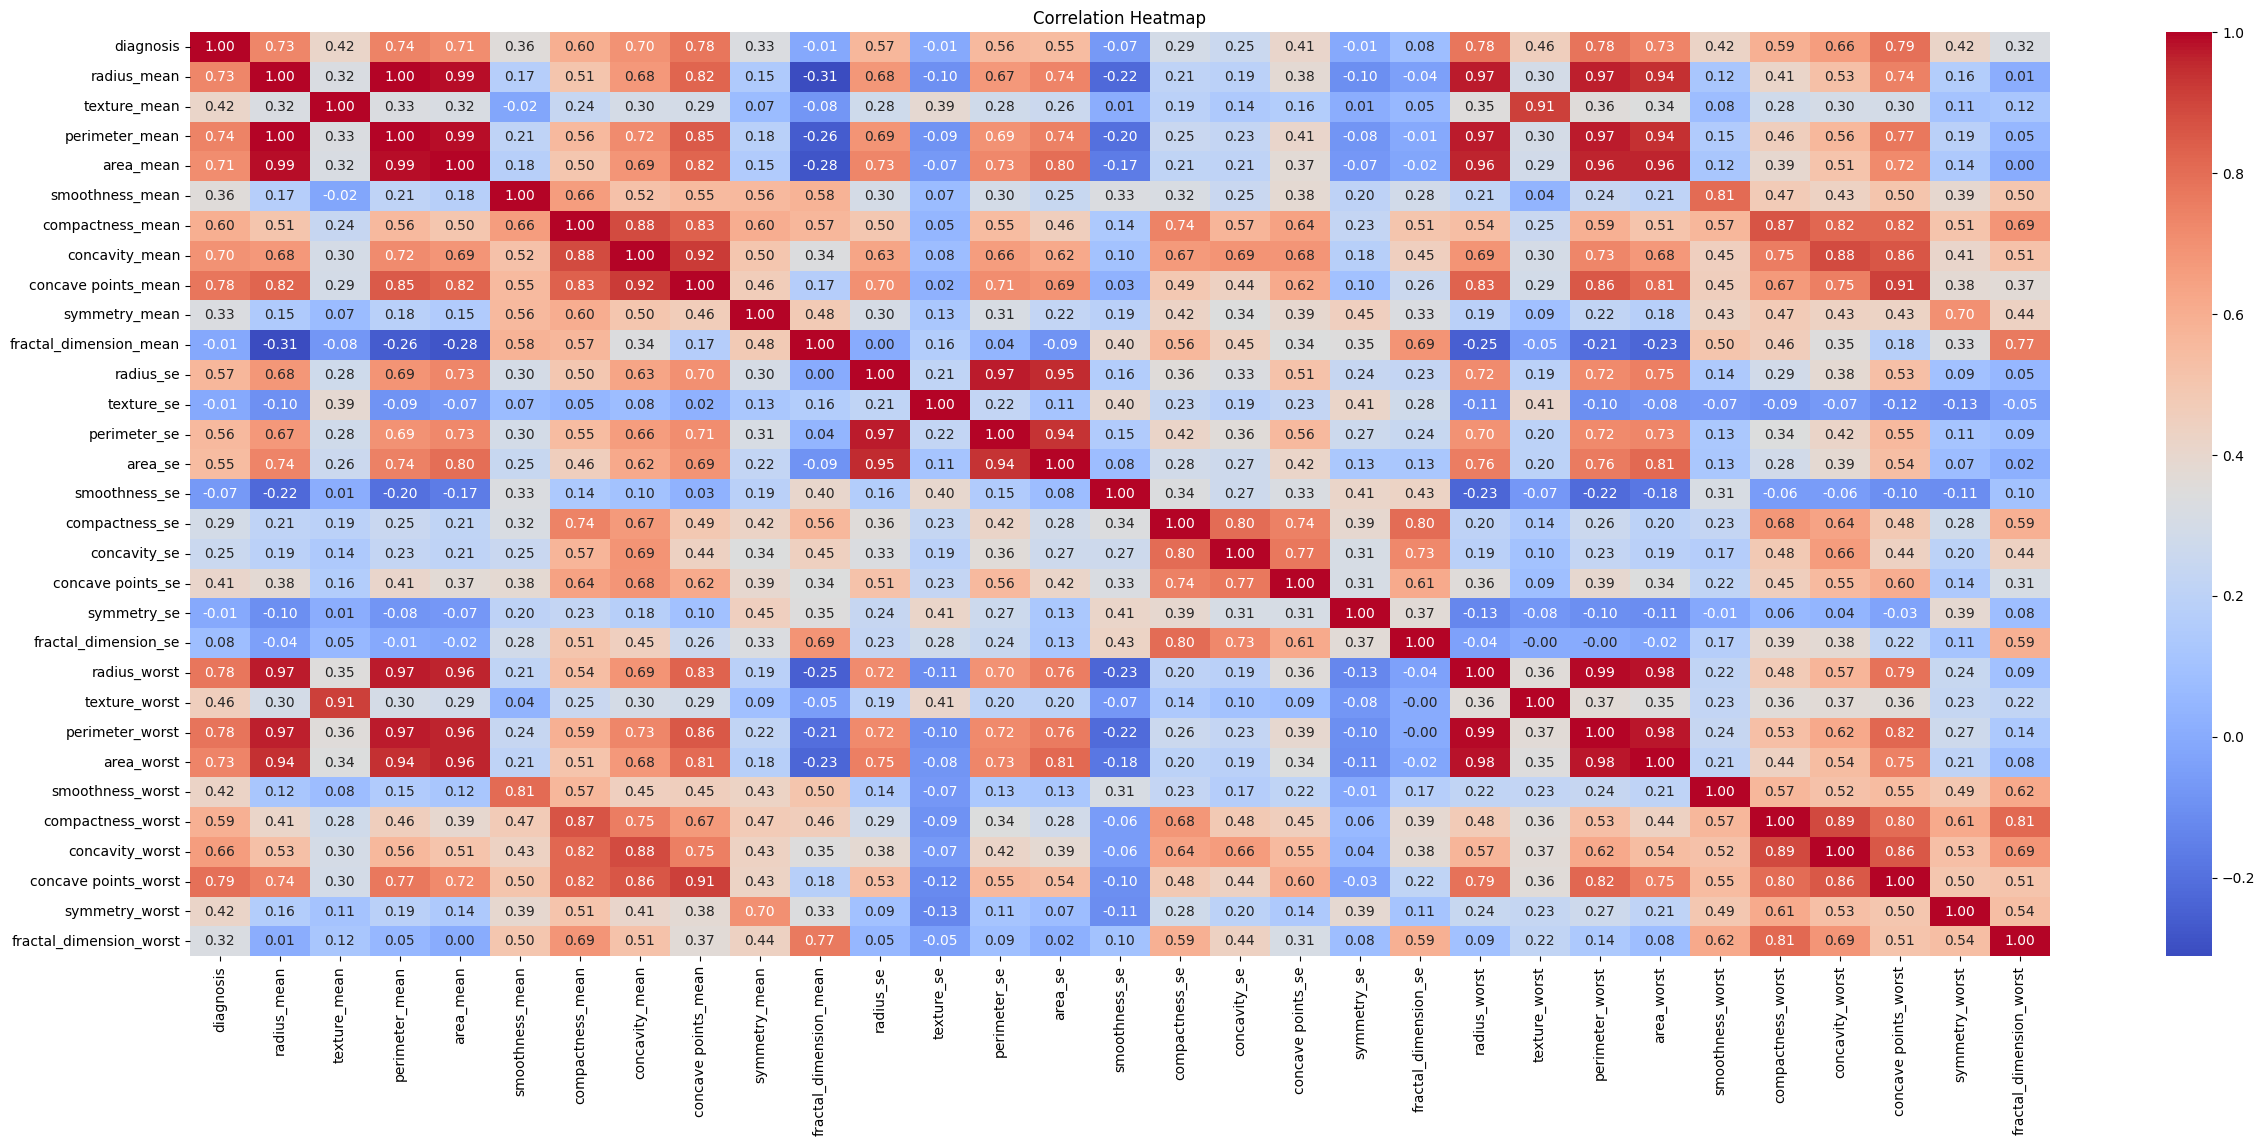

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Feature extraction for model fitting

In [9]:
# Separate the features and target
X = df[['radius_mean','perimeter_mean','area_mean','concave points_worst','perimeter_worst','radius_worst','concave points_mean']]
y = df['diagnosis']

In [ ]:
X

,radius_mean,perimeter_mean,area_mean,concave points_worst,perimeter_worst,radius_worst,concave points_mean
0,17.99,122.80,1001.0,0.2654,184.60,25.380,0.14710
1,20.57,132.90,1326.0,0.1860,158.80,24.990,0.07017
2,19.69,130.00,1203.0,0.2430,152.50,23.570,0.12790
3,11.42,77.58,386.1,0.2575,98.87,14.910,0.10520
4,20.29,135.10,1297.0,0.1625,152.20,22.540,0.10430
...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.2216,166.10,25.450,0.13890
565,20.13,131.20,1261.0,0.1628,155.00,23.690,0.09791
566,16.60,108.30,858.1,0.1418,126.70,18.980,0.05302
567,20.60,140.10,1265.0,0.2650,184.60,25.740,0.15200


In [10]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


### Fitting the Neural network model on the extracted features against the target variable and fine tuning the hyperparameters that will be used to configure the model.

Epoch: 0 Train MSE: 0.506614694127927 Valid MSE: 0.4821872585364383
Epoch: 1 Train MSE: 0.49517792917262926 Valid MSE: 0.4715513176305717
Epoch: 2 Train MSE: 0.4841883129546798 Valid MSE: 0.46133893302129864
Epoch: 3 Train MSE: 0.4736270963571535 Valid MSE: 0.45153247465923413
Epoch: 4 Train MSE: 0.4634766581948088 Valid MSE: 0.442115351171822
Epoch: 5 Train MSE: 0.4537204059067552 Valid MSE: 0.43307191877122536
Epoch: 6 Train MSE: 0.4443426860394017 Valid MSE: 0.4243873991554796
Epoch: 7 Train MSE: 0.4353287035226169 Valid MSE: 0.41604780549451853
Epoch: 8 Train MSE: 0.4266644488545822 Valid MSE: 0.4080398756937045
Epoch: 9 Train MSE: 0.41833663240870256 Valid MSE: 0.4003510122154899
Epoch: 10 Train MSE: 0.4103326251612527 Valid MSE: 0.3929692278166367
Epoch: 11 Train MSE: 0.4026404052129823 Valid MSE: 0.38588309662565246
Epoch: 12 Train MSE: 0.39524850954319324 Valid MSE: 0.37908171004408564
Epoch: 13 Train MSE: 0.38814599049213183 Valid MSE: 0.37255463700721797
Epoch: 14 Train MSE: 

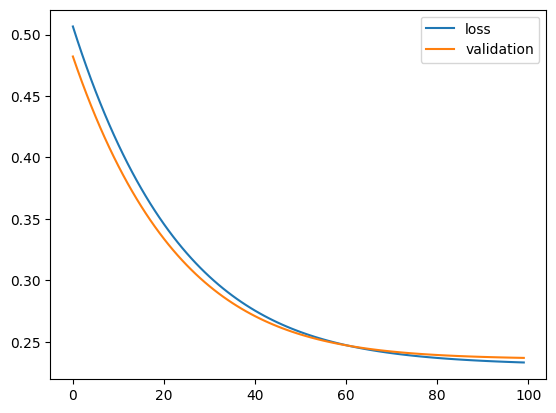

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 100
learn_rate = .0003
batch_size = 20
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],2,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.690927240782645 Valid MSE: 0.6622313081235746
Epoch: 1 Train MSE: 0.6823192181171863 Valid MSE: 0.654021149947304
Epoch: 2 Train MSE: 0.6738788624548941 Valid MSE: 0.645972792086126
Epoch: 3 Train MSE: 0.6656024020226932 Valid MSE: 0.6380826102310042
Epoch: 4 Train MSE: 0.6574861808284973 Valid MSE: 0.6303470898693518
Epoch: 5 Train MSE: 0.6495266538935149 Valid MSE: 0.622762821802612
Epoch: 6 Train MSE: 0.6417203827133866 Valid MSE: 0.6153264978780377
Epoch: 7 Train MSE: 0.6340640309360269 Valid MSE: 0.6080349069233867
Epoch: 8 Train MSE: 0.6265543602447653 Valid MSE: 0.6008849308738968
Epoch: 9 Train MSE: 0.6191882264360462 Valid MSE: 0.5938735410815409
Epoch: 10 Train MSE: 0.6119625756815792 Valid MSE: 0.5869977947971297
Epoch: 11 Train MSE: 0.6048744409654101 Valid MSE: 0.580254831816375
Epoch: 12 Train MSE: 0.5979209386869317 Valid MSE: 0.5736418712815362
Epoch: 13 Train MSE: 0.5910992654213655 Valid MSE: 0.567156208630737
Epoch: 14 Train MSE: 0.5844066948297

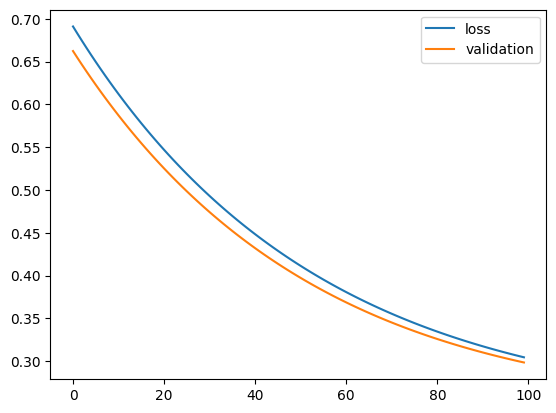

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 100
learn_rate = .0001
batch_size = 20
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],2,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.674257231505833 Valid MSE: 0.6279826206444624
Epoch: 1 Train MSE: 0.6414254824734555 Valid MSE: 0.5979492786448376
Epoch: 2 Train MSE: 0.6110400092081223 Valid MSE: 0.5701736069399886
Epoch: 3 Train MSE: 0.5828989482905647 Valid MSE: 0.5444717288469811
Epoch: 4 Train MSE: 0.5568216373565005 Valid MSE: 0.5206785585443726
Epoch: 5 Train MSE: 0.5326456905964938 Valid MSE: 0.4986452631382663
Epoch: 6 Train MSE: 0.5102245501372695 Valid MSE: 0.4782371328895867
Epoch: 7 Train MSE: 0.4894254288896669 Valid MSE: 0.459331788078445
Epoch: 8 Train MSE: 0.4701275766460664 Valid MSE: 0.44181766448063725
Epoch: 9 Train MSE: 0.45222081400502073 Valid MSE: 0.42559273014502724
Epoch: 10 Train MSE: 0.4356042888726332 Valid MSE: 0.41056339471696496
Epoch: 11 Train MSE: 0.4201854184269814 Valid MSE: 0.396643579427824
Epoch: 12 Train MSE: 0.4058789859798309 Valid MSE: 0.38375392142695613
Epoch: 13 Train MSE: 0.3926063674697092 Valid MSE: 0.37182109064791613
Epoch: 14 Train MSE: 0.3802

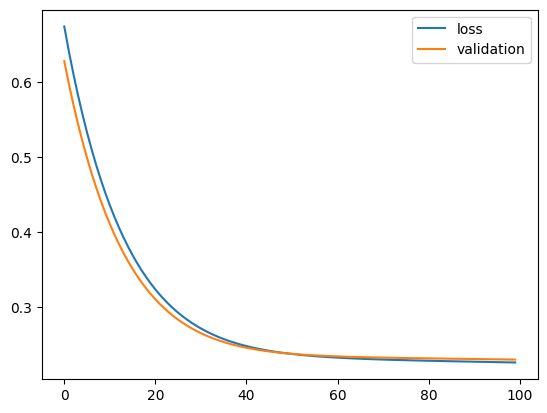

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 100
learn_rate = .0003
batch_size = 20
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],3,3,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.38519172016702674 Valid MSE: 0.2922562421331019
Epoch: 1 Train MSE: 0.2582527084458668 Valid MSE: 0.2504507237837809
Epoch: 2 Train MSE: 0.24430460056717046 Valid MSE: 0.24308979893132468
Epoch: 3 Train MSE: 0.24197628337122812 Valid MSE: 0.24026504967740372
Epoch: 4 Train MSE: 0.24017607722703277 Valid MSE: 0.23802946841208178
Epoch: 5 Train MSE: 0.23816871286779967 Valid MSE: 0.2356025068484983
Epoch: 6 Train MSE: 0.2358501096236134 Valid MSE: 0.23282168485616647
Epoch: 7 Train MSE: 0.23317913969677906 Valid MSE: 0.22963536459069564
Epoch: 8 Train MSE: 0.230116663320537 Valid MSE: 0.22602297670011132
Epoch: 9 Train MSE: 0.2266255371335691 Valid MSE: 0.22192811453549008
Epoch: 10 Train MSE: 0.22286246875072818 Valid MSE: 0.21769542071253145
Epoch: 11 Train MSE: 0.21897790499236144 Valid MSE: 0.21319828232972324
Epoch: 12 Train MSE: 0.21494800584916662 Valid MSE: 0.20848127132139627
Epoch: 13 Train MSE: 0.21064712467199007 Valid MSE: 0.20355338068872875
Epoch: 14 

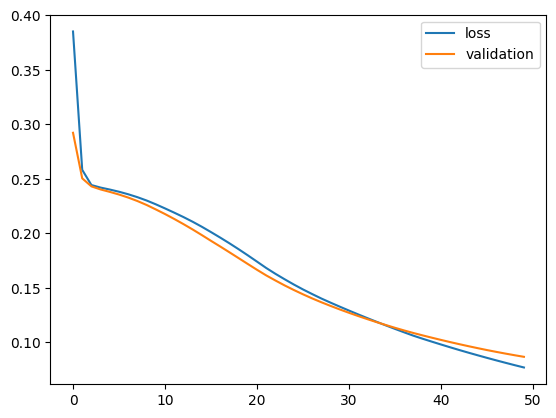

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 50
learn_rate = .01
batch_size = 20
val_split = .3
verbose = 1

layer_structure = [X_train.shape[1],4,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.7841750685784881 Valid MSE: 0.4931782000118521
Epoch: 1 Train MSE: 0.6526673233918472 Valid MSE: 0.4186143209636374
Epoch: 2 Train MSE: 0.5428382640528597 Valid MSE: 0.3601024294967327
Epoch: 3 Train MSE: 0.4510413573723956 Valid MSE: 0.31514425566441806
Epoch: 4 Train MSE: 0.3747495542872023 Valid MSE: 0.28173919694711935
Epoch: 5 Train MSE: 0.3119891523265885 Valid MSE: 0.2581089085734599
Epoch: 6 Train MSE: 0.2610361132003223 Valid MSE: 0.2425832018335354
Epoch: 7 Train MSE: 0.22027779983041823 Valid MSE: 0.23358050600566718
Epoch: 8 Train MSE: 0.18817440811695868 Valid MSE: 0.22963463635161935
Epoch: 9 Train MSE: 0.16327246427145467 Valid MSE: 0.2294342564692379
Epoch: 10 Train MSE: 0.14423702664212096 Valid MSE: 0.23185468659876787
Epoch: 11 Train MSE: 0.12988190694627874 Valid MSE: 0.2359729376181061
Epoch: 12 Train MSE: 0.11918781828686845 Valid MSE: 0.2410649715932882
Epoch: 13 Train MSE: 0.11130602904404414 Valid MSE: 0.24658886703295907
Epoch: 14 Train M

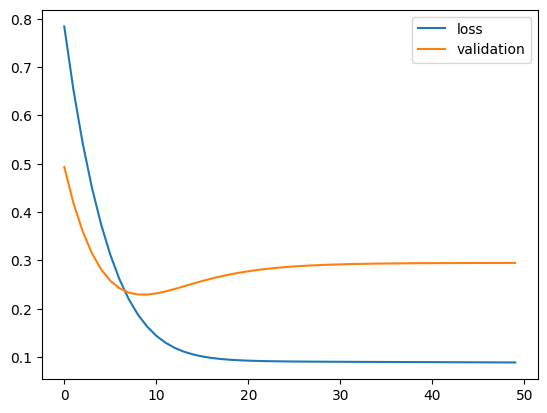

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 50
learn_rate = .003
batch_size = 10
val_split = .15
verbose = 1

layer_structure = [X_train.shape[1],2,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.7070453789182412 Valid MSE: 0.6690785448089244
Epoch: 1 Train MSE: 0.6868270315327296 Valid MSE: 0.6501612114270898
Epoch: 2 Train MSE: 0.6675142862394199 Valid MSE: 0.6320950396292093
Epoch: 3 Train MSE: 0.6490545906713863 Valid MSE: 0.6148314064427995
Epoch: 4 Train MSE: 0.6313997719560831 Valid MSE: 0.598325684561094
Epoch: 5 Train MSE: 0.614505585278637 Valid MSE: 0.5825368333474544
Epoch: 6 Train MSE: 0.5983313142099265 Valid MSE: 0.5674270362956281
Epoch: 7 Train MSE: 0.5828394161737749 Valid MSE: 0.5529613790737122
Epoch: 8 Train MSE: 0.5679952073814457 Valid MSE: 0.539107563115519
Epoch: 9 Train MSE: 0.5537665823642088 Valid MSE: 0.5258356504275772
Test error:  0.5417410307889887


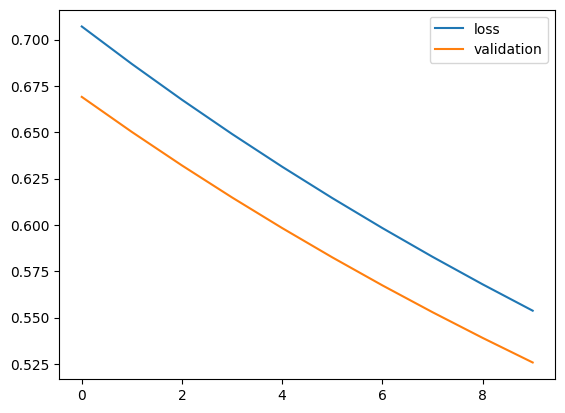

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 10
learn_rate = .0003
batch_size = 20
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],2,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.9656282176652674 Valid MSE: 0.7256238789893212
Epoch: 1 Train MSE: 0.9551799711136391 Valid MSE: 0.7175603090196514
Epoch: 2 Train MSE: 0.9448766716680888 Valid MSE: 0.7096226924019645
Epoch: 3 Train MSE: 0.9347155896052475 Valid MSE: 0.7018086250123904
Epoch: 4 Train MSE: 0.9246940710114229 Valid MSE: 0.6941157695341903
Epoch: 5 Train MSE: 0.9148095351843952 Valid MSE: 0.6865418531347673
Epoch: 6 Train MSE: 0.9050594721357157 Valid MSE: 0.6790846652333746
Epoch: 7 Train MSE: 0.8954414401890605 Valid MSE: 0.6717420553554999
Epoch: 8 Train MSE: 0.8859530636704229 Valid MSE: 0.6645119310701181
Epoch: 9 Train MSE: 0.8765920306861347 Valid MSE: 0.6573922560061874
Epoch: 10 Train MSE: 0.8673560909849106 Valid MSE: 0.6503810479449464
Epoch: 11 Train MSE: 0.8582430539002979 Valid MSE: 0.6434763769847435
Epoch: 12 Train MSE: 0.8492507863700848 Valid MSE: 0.636676363775284
Epoch: 13 Train MSE: 0.8403772110294042 Valid MSE: 0.6299791778183402
Epoch: 14 Train MSE: 0.83162030

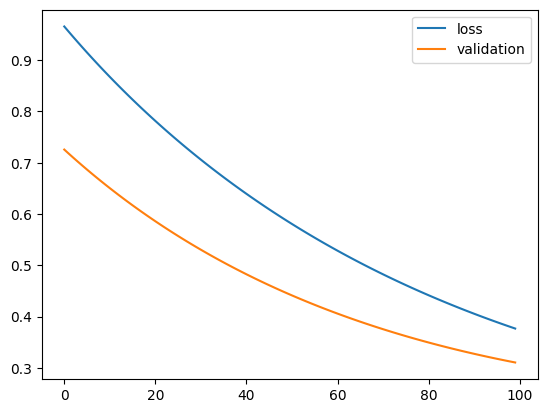

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 100
learn_rate = .0003
batch_size = 5
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],2,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.5194703837614769 Valid MSE: 0.27414737253464055
Epoch: 1 Train MSE: 0.2591179453823263 Valid MSE: 0.23398683799316347
Epoch: 2 Train MSE: 0.2288212935046327 Valid MSE: 0.23099069788361612
Epoch: 3 Train MSE: 0.22462883565877556 Valid MSE: 0.22825250912664574
Epoch: 4 Train MSE: 0.22106647627288797 Valid MSE: 0.22449378273881188
Epoch: 5 Train MSE: 0.21671146388022203 Valid MSE: 0.2195854786190362
Epoch: 6 Train MSE: 0.21118970734103787 Valid MSE: 0.21343684263055399
Epoch: 7 Train MSE: 0.20430406490984868 Valid MSE: 0.20614211187865014
Epoch: 8 Train MSE: 0.19658845569896105 Valid MSE: 0.19836995080195524
Epoch: 9 Train MSE: 0.18834395344014804 Valid MSE: 0.18976482396503117
Epoch: 10 Train MSE: 0.17969827499907695 Valid MSE: 0.18053400097307878
Epoch: 11 Train MSE: 0.1705251624151814 Valid MSE: 0.17134406168884286
Epoch: 12 Train MSE: 0.16186219409007507 Valid MSE: 0.1624028999715191
Epoch: 13 Train MSE: 0.1531341737409345 Valid MSE: 0.1536164424538325
Epoch: 14 

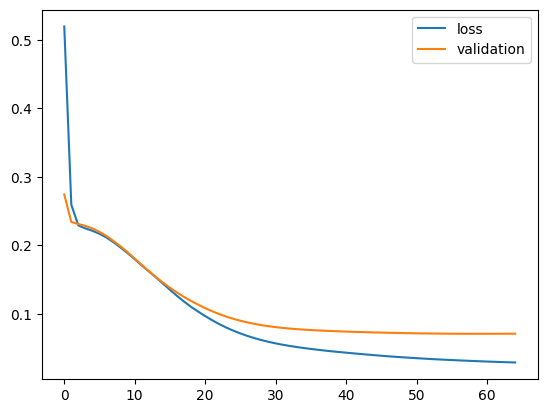

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 65
learn_rate = .01
batch_size = 20
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],2,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.510180416562947 Valid MSE: 0.47170457174513275
Epoch: 1 Train MSE: 0.5073992592449361 Valid MSE: 0.4692256221762896
Epoch: 2 Train MSE: 0.5046362076343738 Valid MSE: 0.466763951914772
Epoch: 3 Train MSE: 0.5018911559638699 Valid MSE: 0.4643194599369726
Epoch: 4 Train MSE: 0.49916400027462116 Valid MSE: 0.46189204685092056
Epoch: 5 Train MSE: 0.4964546383656225 Valid MSE: 0.45948161484902605
Epoch: 6 Train MSE: 0.4937629697439142 Valid MSE: 0.45708806766181004
Epoch: 7 Train MSE: 0.4910888955758466 Valid MSE: 0.45471131051259783
Epoch: 8 Train MSE: 0.4884323186393403 Valid MSE: 0.45235125007316207
Epoch: 9 Train MSE: 0.48579314327712697 Valid MSE: 0.450007794420297
Epoch: 10 Train MSE: 0.48317127535095183 Valid MSE: 0.4476808529933072
Epoch: 11 Train MSE: 0.48056662219672125 Valid MSE: 0.44537033655239394
Epoch: 12 Train MSE: 0.4779790925805766 Valid MSE: 0.4430761571379262
Epoch: 13 Train MSE: 0.475408596655883 Valid MSE: 0.4407982280305771
Epoch: 14 Train MSE: 0.

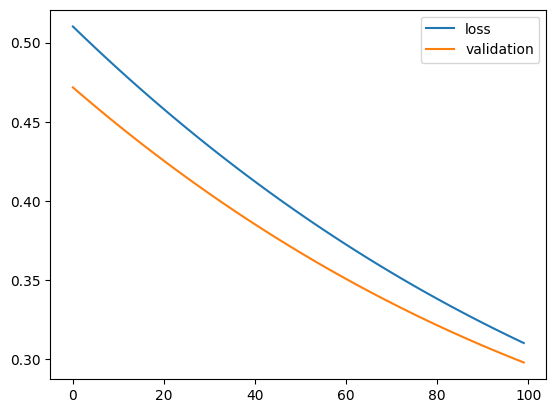

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 100
learn_rate = .0001
batch_size = 10
val_split = 0.25
verbose = 1

layer_structure = [X_train.shape[1],5,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.6588313317163634 Valid MSE: 0.6701093306520786
Epoch: 1 Train MSE: 0.6391494538333939 Valid MSE: 0.650471212537579
Epoch: 2 Train MSE: 0.6204401818146867 Valid MSE: 0.6317779584484975
Epoch: 3 Train MSE: 0.6026455041001716 Valid MSE: 0.6139744306392875
Epoch: 4 Train MSE: 0.5857121531186353 Valid MSE: 0.5970099270235378
Epoch: 5 Train MSE: 0.5695911090580734 Valid MSE: 0.5808377226240823
Epoch: 6 Train MSE: 0.554237162615766 Valid MSE: 0.5654146648820404
Epoch: 7 Train MSE: 0.5396085289978623 Valid MSE: 0.550700815860732
Epoch: 8 Train MSE: 0.5256665065650743 Valid MSE: 0.536659135381973
Epoch: 9 Train MSE: 0.5123751744663081 Valid MSE: 0.5232551999743503
Epoch: 10 Train MSE: 0.49970112439746983 Valid MSE: 0.5104569532232783
Epoch: 11 Train MSE: 0.4876132222940941 Valid MSE: 0.49823448371342655
Epoch: 12 Train MSE: 0.4760823963348716 Valid MSE: 0.4865598272638435
Epoch: 13 Train MSE: 0.4650814481158414 Valid MSE: 0.47540679058985696
Epoch: 14 Train MSE: 0.45458488

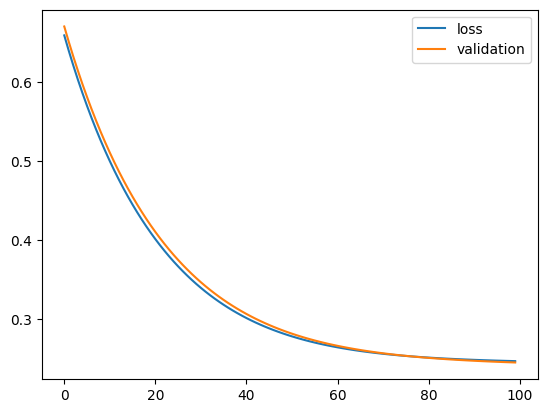

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 100
learn_rate = .0003
batch_size = 20
val_split = 0.40
verbose = 1

layer_structure = [X_train.shape[1],2,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.6404358337658111 Valid MSE: 0.5469333863856021
Epoch: 1 Train MSE: 0.6109421972838789 Valid MSE: 0.5224803062593466
Epoch: 2 Train MSE: 0.5834123088798899 Valid MSE: 0.4997621028206047
Epoch: 3 Train MSE: 0.5576939338146184 Valid MSE: 0.4786459926041613
Epoch: 4 Train MSE: 0.5336520633846606 Valid MSE: 0.4590135813734101
Epoch: 5 Train MSE: 0.5111663040630342 Valid MSE: 0.44075870431487696
Epoch: 6 Train MSE: 0.49012869831927286 Valid MSE: 0.4237856236081028
Epoch: 7 Train MSE: 0.470441901642853 Valid MSE: 0.40800752174462834
Epoch: 8 Train MSE: 0.45201765501796676 Valid MSE: 0.39334524071452676
Epoch: 9 Train MSE: 0.4347755035799073 Valid MSE: 0.3797262263826353
Epoch: 10 Train MSE: 0.4186417211969963 Valid MSE: 0.36708364463884274
Epoch: 11 Train MSE: 0.40354840784625756 Valid MSE: 0.35535564167839717
Epoch: 12 Train MSE: 0.38943273232236864 Valid MSE: 0.3444847253902157
Epoch: 13 Train MSE: 0.376236297368435 Valid MSE: 0.3344172485626202
Epoch: 14 Train MSE: 0.

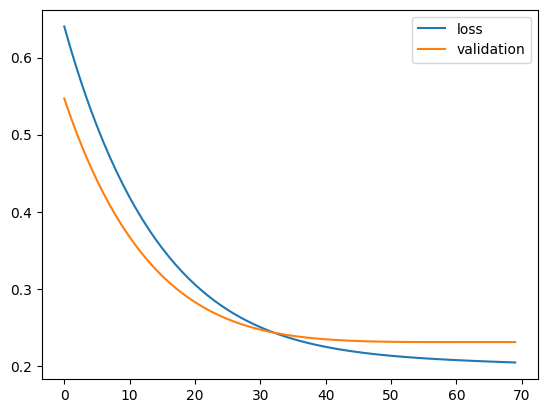

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 70
learn_rate = .0003
batch_size = 30
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],2,2,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.7862941409872096 Valid MSE: 0.6914587390428426
Epoch: 1 Train MSE: 0.6932777647568165 Valid MSE: 0.6131873073059174
Epoch: 2 Train MSE: 0.6160722291659706 Valid MSE: 0.548297074694342
Epoch: 3 Train MSE: 0.5518417415466457 Valid MSE: 0.4944273510198127
Epoch: 4 Train MSE: 0.49832750335947007 Valid MSE: 0.4496793586679759
Epoch: 5 Train MSE: 0.45370621942072953 Valid MSE: 0.41250828319562544
Epoch: 6 Train MSE: 0.41648997493567785 Valid MSE: 0.3816457157944027
Epoch: 7 Train MSE: 0.38545391551419195 Valid MSE: 0.356042768258797
Epoch: 8 Train MSE: 0.3595829225864424 Valid MSE: 0.33482747641682986
Epoch: 9 Train MSE: 0.33803147677166734 Valid MSE: 0.31727224220567984
Epoch: 10 Train MSE: 0.32009282977666487 Valid MSE: 0.302768452269113
Epoch: 11 Train MSE: 0.3051748635195932 Valid MSE: 0.290806324685558
Epoch: 12 Train MSE: 0.2927808460403989 Valid MSE: 0.2809586428818078
Epoch: 13 Train MSE: 0.2824938474880089 Valid MSE: 0.2728674425294524
Epoch: 14 Train MSE: 0.27

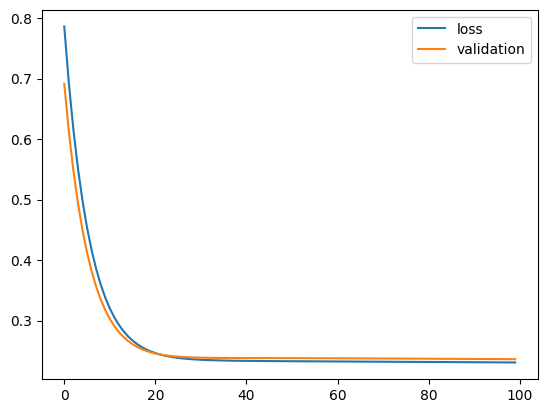

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 100
learn_rate = .0003
batch_size = 20
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],8,8,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))